<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [1]:
# Something new to install...
! pip install plotly

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [5]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [7]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [9]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [11]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [13]:
# Filter Data to Most Recent Year
df['year'].value_counts() #most recent year is 2007

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: count, dtype: int64

In [15]:
df.shape

(1704, 8)

In [17]:
df = df[df['year'] == 2007]
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.82800,31889923,974.58034,AFG,4
23,Albania,Europe,2007,76.42300,3600523,5937.02953,ALB,8
35,Algeria,Africa,2007,72.30100,33333216,6223.36747,DZA,12
47,Angola,Africa,2007,42.73100,12420476,4797.23127,AGO,24
59,Argentina,Americas,2007,75.32000,40301927,12779.37964,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.24900,85262356,2441.57640,VNM,704
1667,West Bank and Gaza,Asia,2007,73.42200,4018332,3025.34980,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.69800,22211743,2280.76991,YEM,887
1691,Zambia,Africa,2007,42.38400,11746035,1271.21159,ZMB,894


In [19]:
# Set Country to Index
df.set_index('country', inplace=True)

In [23]:
# Drop `iso_alpha`, `year`, and `iso_num`
df = df.drop(columns=['year', 'iso_alpha', 'iso_num'])
df.head()

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.82800,31889923,974.58034
Albania,Europe,76.42300,3600523,5937.02953
Algeria,Africa,72.30100,33333216,6223.36747
Angola,Africa,42.73100,12420476,4797.23127
Argentina,Americas,75.32000,40301927,12779.37964


In [31]:
df['continent'].value_counts()

continent
Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: count, dtype: int64

In [35]:
# How many countries in each continent? 
df['continent'].value_counts()

continent
Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: count, dtype: int64

In [37]:
df.shape

(142, 4)

In [39]:
df

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.82800,31889923,974.58034
Albania,Europe,76.42300,3600523,5937.02953
Algeria,Africa,72.30100,33333216,6223.36747
Angola,Africa,42.73100,12420476,4797.23127
Argentina,Americas,75.32000,40301927,12779.37964
...,...,...,...,...
Vietnam,Asia,74.24900,85262356,2441.57640
West Bank and Gaza,Asia,73.42200,4018332,3025.34980
"Yemen, Rep.",Asia,62.69800,22211743,2280.76991


In [41]:
# Get dummies!
df_dummy = pd.get_dummies(df, columns=['continent'], drop_first=False)

In [43]:
# Head (again!)
df_dummy.head()

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,False,False,True,False,False
Albania,76.42300,3600523,5937.02953,False,False,False,True,False
Algeria,72.30100,33333216,6223.36747,True,False,False,False,False
Angola,42.73100,12420476,4797.23127,True,False,False,False,False
Argentina,75.32000,40301927,12779.37964,False,True,False,False,False


In [45]:
# Define X
X = df_dummy.drop(columns=['lifeExp']) 
X

,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,
Afghanistan,31889923,974.58034,False,False,True,False,False
Albania,3600523,5937.02953,False,False,False,True,False
Algeria,33333216,6223.36747,True,False,False,False,False
Angola,12420476,4797.23127,True,False,False,False,False
Argentina,40301927,12779.37964,False,True,False,False,False
...,...,...,...,...,...,...,...
Vietnam,85262356,2441.57640,False,False,True,False,False
West Bank and Gaza,4018332,3025.34980,False,False,True,False,False
"Yemen, Rep.",22211743,2280.76991,False,False,True,False,False


In [47]:
# Scale Features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [49]:
print(X_scaled.mean()) #mean should be 0
print(X_scaled.std()) #should be 1

2.5912650071734036e-17
1.0


### II. K-Means Clustering Model

In [115]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [57]:
# Elbow Plot 

inertia_list = []

for k in range(1, 21): 
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia_list.append(km.inertia_)

inertia_list

[994.0000000000001,
 768.7399713196763,
 579.4563722818283,
 359.8553454071143,
 213.31351868979192,
 93.47526851250699,
 74.02998110048043,
 42.40359701269873,
 29.81835621679816,
 27.846855585409887,
 23.34884540234232,
 21.558378335679322,
 18.250609693427045,
 17.229021454991972,
 15.072844843522088,
 13.820324383645175,
 11.343576586824808,
 9.899555005937458,
 8.519358471509822,
 7.530196167573207]

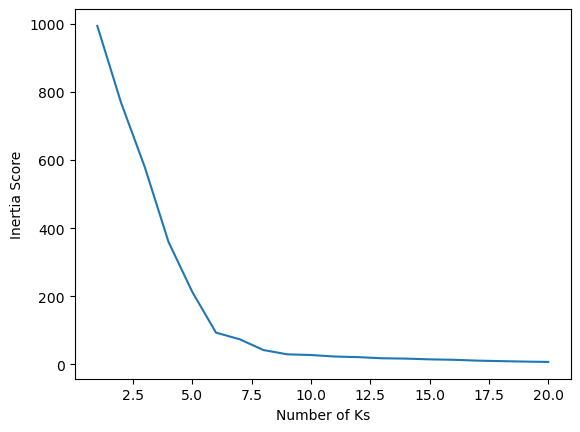

In [61]:
plt.plot(list(range(1,21)), inertia_list)
plt.xlabel("Number of Ks")
plt.ylabel("Inertia Score")
plt.show() # the lower inertia score is better, best is k = 5-6 where the elbow starts. 

In [59]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, km.labels_))

# silhouette score (-1 to 1) Higher score = better separated clusters
silhouette_list

[0.3909747154430385,
 0.4998159480318514,
 0.6897008272089893,
 0.7279420795486763,
 0.7641197051141424,
 0.7489868387820197,
 0.7635675388242954,
 0.7641080365539938,
 0.701394376930666,
 0.6980827357366973,
 0.695457769907066,
 0.6148943790408065,
 0.6034208421262109,
 0.5725604415459686,
 0.5267084294264548,
 0.5541377509820165,
 0.5663043149770265,
 0.5677189934788665,
 0.5711185361076184]

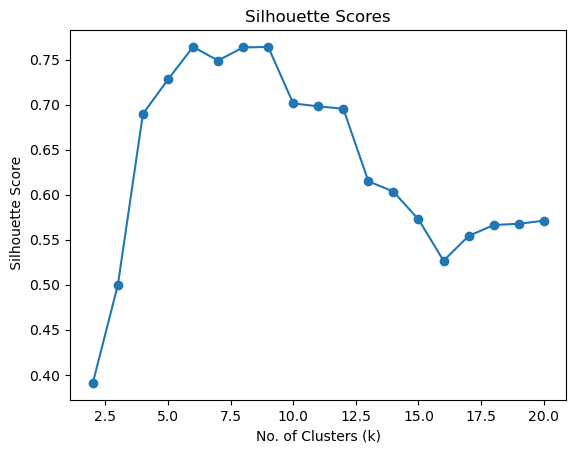

In [64]:
# Plotting silhouette scores for different k values

plt.plot(range(2,21),          
        silhouette_list,      
        marker='o')           

plt.xlabel("No. of Clusters (k)")
plt.ylabel(" Silhouette Score")
plt.title("Silhouette Scores")
plt.show()

#### Based off of our metrics above, which k should we try first?

Answer Here: Based on the elbow on the k score, k=6, based on the silhouette score, k= 6. 

In [67]:
# Now let's try it!
km = KMeans(n_clusters=6, random_state=42)

# Instantiate & Fit
km.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [69]:
# Silhouette Score
silhouette_score(X_scaled, km.labels_) 

0.7641197051141424

In [71]:
km.labels_

array([3, 1, 2, 2, 0, 4, 1, 3, 3, 1, 2, 0, 1, 2, 0, 1, 2, 2, 3, 2, 0, 2,
       2, 0, 5, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 3, 1, 1, 5, 3, 3, 3, 1, 3, 1, 0,
       3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 3, 1, 2, 2, 3,
       2, 3, 1, 4, 0, 2, 2, 1, 3, 3, 0, 0, 0, 3, 1, 1, 0, 2, 1, 2, 2, 3,
       2, 1, 2, 3, 1, 1, 2, 2, 1, 3, 2, 2, 1, 1, 3, 3, 2, 3, 2, 0, 2, 1,
       2, 1, 0, 0, 0, 3, 3, 3, 2, 2])

In [75]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6
0,-0.08247,-0.83542,-0.76012,-0.46225,1.81742,-0.51755,-0.11952
1,-0.27478,-0.44816,-0.76012,-0.46225,-0.55023,1.93218,-0.11952
2,-0.07266,-0.42582,1.31559,-0.46225,-0.55023,-0.51755,-0.11952
3,-0.21482,-0.53711,1.31559,-0.46225,-0.55023,-0.51755,-0.11952
4,-0.02528,0.08579,-0.76012,2.16333,-0.55023,-0.51755,-0.11952
...,...,...,...,...,...,...,...
137,0.28036,-0.72094,-0.76012,-0.46225,1.81742,-0.51755,-0.11952
138,-0.27194,-0.67538,-0.76012,-0.46225,1.81742,-0.51755,-0.11952
139,-0.14826,-0.73349,-0.76012,-0.46225,1.81742,-0.51755,-0.11952
140,-0.21941,-0.81227,1.31559,-0.46225,-0.55023,-0.51755,-0.11952


#### Visualize Your Clusters!

In [77]:
# Add cluster column
X_scaled['cluster'] = km.labels_

In [79]:
X_scaled.head()

,0,1,2,3,4,5,6,cluster
0,-0.08247,-0.83542,-0.76012,-0.46225,1.81742,-0.51755,-0.11952,3
1,-0.27478,-0.44816,-0.76012,-0.46225,-0.55023,1.93218,-0.11952,1
2,-0.07266,-0.42582,1.31559,-0.46225,-0.55023,-0.51755,-0.11952,2
3,-0.21482,-0.53711,1.31559,-0.46225,-0.55023,-0.51755,-0.11952,2
4,-0.02528,0.08579,-0.76012,2.16333,-0.55023,-0.51755,-0.11952,0


In [83]:
cluster = km.labels_

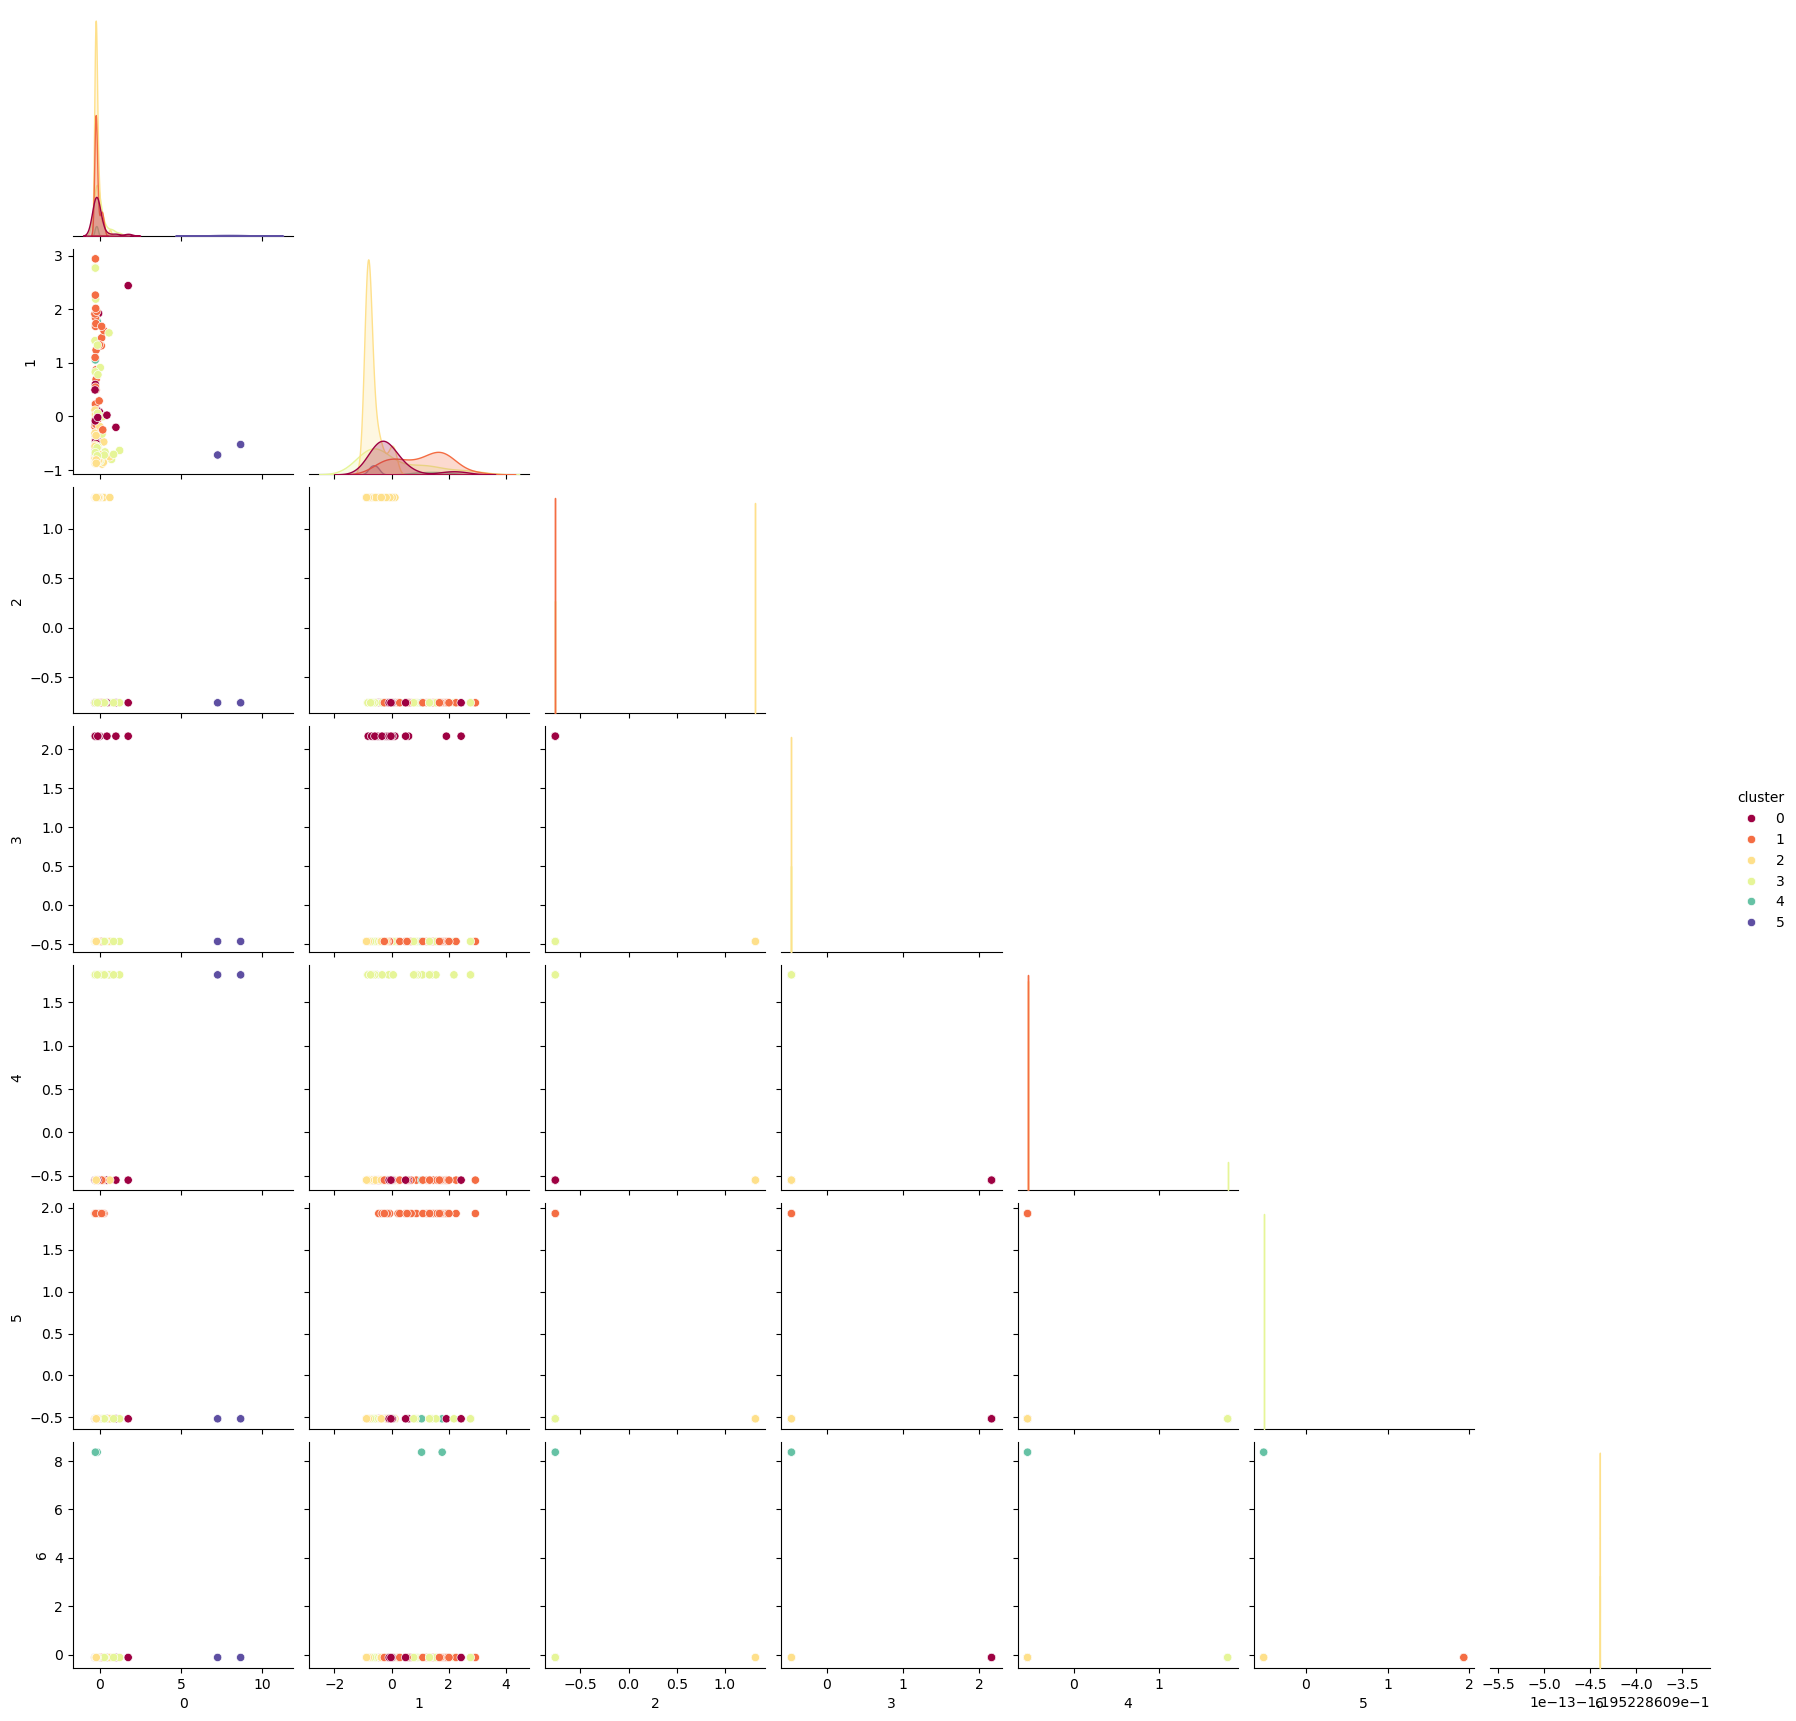

In [93]:
# Method 1: Pairplots/Scatterplots
sns.pairplot(X_scaled, hue='cluster', palette='Spectral', corner=True);

In [91]:
# Method 2: Groupby
X_scaled.groupby('cluster').size()

cluster
0    25
1    30
2    52
3    31
4     2
5     2
dtype: int64

In [101]:
X_scaled.groupby('cluster').mean()

,0,1,2,3,4,5,6
cluster,,,,,,,
0,-0.05484,-0.05283,-0.76012,2.16333,-0.55023,-0.51755,-0.11952
1,-0.16645,1.04369,-0.76012,-0.46225,-0.55023,1.93218,-0.11952
2,-0.17774,-0.67041,1.31559,-0.46225,-0.55023,-0.51755,-0.11952
3,0.00399,0.10602,-0.76012,-0.46225,1.81742,-0.51755,-0.11952
4,-0.21581,1.41480,-0.76012,-0.46225,-0.55023,-0.51755,8.36660
5,7.95726,-0.62229,-0.76012,-0.46225,1.81742,-0.51755,-0.11952


#### An Even Closer Look...Which countries are in each of these clusters?

In [97]:
# For loop
df['cluster'] = km.labels_
df

,continent,lifeExp,pop,gdpPercap,cluster
country,,,,,
Afghanistan,Asia,43.82800,31889923,974.58034,3
Albania,Europe,76.42300,3600523,5937.02953,1
Algeria,Africa,72.30100,33333216,6223.36747,2
Angola,Africa,42.73100,12420476,4797.23127,2
Argentina,Americas,75.32000,40301927,12779.37964,0
...,...,...,...,...,...
Vietnam,Asia,74.24900,85262356,2441.57640,3
West Bank and Gaza,Asia,73.42200,4018332,3025.34980,3
"Yemen, Rep.",Asia,62.69800,22211743,2280.76991,3


In [121]:
count_countries = df.groupby('cluster').apply(lambda x: x.index.tolist())

for cluster, countries in count_countries.items():
    print(f"Cluster {cluster}:")
    print(", ".join(countries))
    print("-" *100)

Cluster 0:
Argentina, Bolivia, Brazil, Canada, Chile, Colombia, Costa Rica, Cuba, Dominican Republic, Ecuador, El Salvador, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Puerto Rico, Trinidad and Tobago, United States, Uruguay, Venezuela
----------------------------------------------------------------------------------------------------
Cluster 1:
Albania, Austria, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom
----------------------------------------------------------------------------------------------------
Cluster 2:
Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Djibouti, Egypt, Equatorial Guinea, Eritr

C:\Users\Nareerat Moottatarn\AppData\Local\Temp\ipykernel_25180\1305931572.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  count_countries = df.groupby('cluster').apply(lambda x: x.index.tolist())


### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [ ]:
#DBSCAN Model

In [123]:
df.keys()

Index(['continent', 'lifeExp', 'pop', 'gdpPercap', 'cluster'], dtype='object')

In [125]:
df.ndim

2

In [129]:
sc = StandardScaler()
X_scaled_DB = sc.fit_transform(X)

In [131]:
print(X_scaled_DB.mean()) #zero

2.5912650071734036e-17


In [133]:
print(X_scaled_DB.std()) #std =1

1.0


In [183]:
# Fit and model
dbs = DBSCAN(
    eps=2.3, 
    min_samples=5, 
    metric='euclidean') 

In [185]:
dbs.fit(X_scaled_DB)  

DBSCAN(eps=2.3)

In [187]:
dbs.labels_ 

array([ 0,  1,  2,  2,  3, -1,  1,  0,  0,  1,  2,  3,  1,  2,  3,  1,  2,
        2,  0,  2,  3,  2,  2,  3, -1,  3,  2,  2,  2,  3,  2,  1,  3,  1,
        1,  2,  3,  3,  2,  3,  2,  2,  2,  1,  1,  2,  2,  1,  2,  1,  3,
        2,  2,  3,  3,  0,  1,  1, -1,  0,  0,  0,  1,  0,  1,  3,  0,  0,
        2,  0,  0,  0,  0,  2,  2,  2,  2,  2,  0,  2,  2,  2,  3,  0,  1,
        2,  2,  0,  2,  0,  1, -1,  3,  2,  2,  1,  0,  0,  3,  3,  3,  0,
        1,  1,  3,  2,  1,  2,  2,  0,  2,  1,  2,  0,  1,  1,  2,  2,  1,
        0,  2,  2,  1,  1,  0,  0,  2,  0,  2,  3,  2,  1,  2,  1,  3,  3,
        3,  0,  0,  0,  2,  2], dtype=int64)

In [189]:
pd.Series(dbs.labels_).value_counts()

 2    52
 0    31
 1    30
 3    25
-1     4
Name: count, dtype: int64

In [191]:
plt.figure(figsize=(8,4))

colors = {-1:'gray', 0:'blue', 1:'red'} #color map for each label
labels = {-1: 'Noise', 0:'Cluster 0', 1:'Cluster 1'} #legend labels

<Figure size 800x400 with 0 Axes>

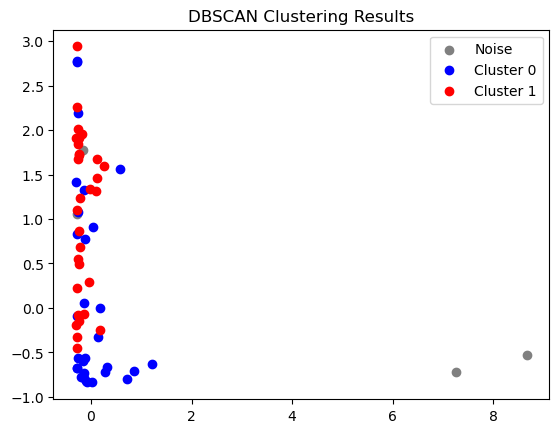

In [193]:
for label, color in colors.items():
    mask = dbs.labels_ == label
    plt.scatter(X_scaled_DB[mask, 0], X_scaled_DB[mask, 1], c=color, label=labels[label])

plt.title('DBSCAN Clustering Results')
plt.legend()
plt.show()

In [195]:
# Silhouette Score
silhouette_score(X_scaled, dbs.labels_) # the silhoutte score is 0.75 which is similar to the kmeans k=6 (score 0.77). 
#(higher silhoutte score = better)

0.754607972347971

In [199]:
dbscan_cluster = df.groupby('cluster').apply(lambda x: x.index.tolist())

# Display countries for each DBSCAN cluster
for cluster, countries in dbscan_cluster.items():
    print(f"DBSCAN Cluster {cluster}: {countries}")

DBSCAN Cluster 0: ['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']
DBSCAN Cluster 1: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
DBSCAN Cluster 2: ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia

C:\Users\Nareerat Moottatarn\AppData\Local\Temp\ipykernel_25180\688067675.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dbscan_cluster = df.groupby('cluster').apply(lambda x: x.index.tolist())


### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 